In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)

***lets start with importing and reading the dataset***

In [3]:
data = pd.read_csv('C:/Users/ASUS/Downloads/archive (1)/quikr_car.csv')

In [4]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


# Data Cleaning

***Lets check null values first and then start with data cleaning***

In [5]:
data.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

***Since there are no null values in 'company' column but we will need to check that column explicitly, because its a object datatype column and it could have any bad entry other than actual company name*** 

In [6]:
data['company']=data['company'].str.lower()
wrong_companies=data['company'].value_counts()[data['company'].value_counts()<5].index
wrong_companies

Index(['i', 'force', 'fiat', 'hindustan', 'used', 'urgent', 'jaguar', 'sale',
       'swift', 'all', 'any', 'sell', 'land', 'scratch', '9', '7', 'well',
       'urjent', '2012', 'volvo', 'very', 'yamaha', 'jeep', 'selling', 'tara'],
      dtype='object')

***As we can see in comapny column, there are multiple wrong entries, so lets first remove such entries.***

In [7]:
data.set_index('company', drop=True, inplace=True)

for i in wrong_companies:
    data.drop(i, inplace=True)

data.reset_index(inplace=True)
data['company'].value_counts()


maruti        237
hyundai       145
mahindra      100
tata           78
honda          61
toyota         39
chevrolet      35
renault        34
ford           31
volkswagen     20
skoda          13
audi           11
mini            8
bmw             8
datsun          8
mitsubishi      6
nissan          6
commercial      6
mercedes        6
Name: company, dtype: int64

***'Company' column is cleaned now, Lets start working on 'name' column***

In [8]:
data['name']=data['name'].str.lower().str.replace('maruti suzuki', 'marutisuzuki')

In [9]:
data['name']=data['name'].str.split(' ').str.slice(0,2).str.join(' ')

In [10]:
data['name'].value_counts()

marutisuzuki swift         56
marutisuzuki alto          49
mahindra scorpio           39
honda city                 33
marutisuzuki wagon         28
tata indigo                24
hyundai i20                23
renault duster             21
hyundai santro             20
chevrolet beat             18
honda amaze                18
hyundai eon                18
marutisuzuki ertiga        17
hyundai elite              16
ford ecosport              16
hyundai grand              15
hyundai verna              15
mahindra xuv500            14
marutisuzuki zen           14
tata indica                14
marutisuzuki dzire         14
toyota corolla             13
hyundai i10                11
mahindra jeep              10
toyota innova              10
toyota etios               10
tata zest                  10
volkswagen polo            10
marutisuzuki omni           9
mini cooper                 8
marutisuzuki ritz           8
tata sumo                   8
mahindra xylo               8
ford figo 

***From the above result, we are sure enough that the 'name' column is adquetly cleaned*** <br>
***Now lets start working on 'year' column***

In [11]:
data['year'].value_counts()

2015    111
2014     94
2013     92
2016     75
2012     74
2011     60
2009     55
2017     54
2010     44
2018     34
2019     22
2006     22
2007     19
2008     14
2005     13
2003     13
2004     12
2000      6
2001      5
2002      4
...       3
sale      3
car       2
o...      2
cab       1
t xe      1
cent      1
k...      1
d...      1
e...      1
digo      1
SALE      1
/-Rs      1
emi       1
Zest      1
Eon       1
2 bs      1
odel      1
ara)      1
1995      1
TOUR      1
150k      1
EV2       1
Name: year, dtype: int64

In [12]:
 data[~data['year'].str.isnumeric()]

,company,name,year,Price,kms_driven,fuel_type
181,commercial,"commercial ,",...,Ask For Price,NaN,NaN
190,tata,tata indigo,150k,"1,50,000",NaN,NaN
201,maruti,marutisuzuki desi,TOUR,"4,00,000",NaN,NaN
278,commercial,"commercial ,",...,Ask For Price,NaN,NaN
357,tata,tata zest,/-Rs,Ask For Price,NaN,NaN
373,maruti,marutisuzuki swift,sale,"3,00,000",NaN,NaN
383,maruti,marutisuzuki swift,ara),"3,00,000",NaN,NaN
418,tata,tata zest,odel,"3,20,000",NaN,NaN
419,mahindra,mahindra xyl,2 bs,"3,50,000",NaN,NaN
543,hyundai,hyun,Eon,Ask For Price,NaN,NaN


***Lets remove these years because there null values in kms_driven and fuel_type columns corresponding to each bad entry in year column***

In [13]:
data = data[data['year'].str.isnumeric()]

In [14]:
data.isna().sum()

company       0
name          0
year          0
Price         0
kms_driven    0
fuel_type     3
dtype: int64

***As we can see, most of the null values are vanished now, lets work with the remaining ones***

In [15]:
data['fuel_type'].value_counts()

Petrol    435
Diesel    384
LPG         2
Name: fuel_type, dtype: int64

In [16]:
data['fuel_type'].fillna('Petrol', inplace=True)

In [17]:
data.isnull().sum()

company       0
name          0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

***Now lets change the column datatypes and do nesessary changes in columns before changing the datatypes***

In [18]:
data['kms_driven']=data['kms_driven'].str.split().str.get(0).str.replace(',','')

In [19]:
data['kms_driven'].replace('Petrol', np.nan, inplace=True)

In [20]:
data['kms_driven']=data['kms_driven'].astype(float)

In [21]:
data['kms_driven']=data['kms_driven'].replace(np.nan, data['kms_driven'].mean())

In [22]:
data['kms_driven']=data['kms_driven'].astype(int)

***'kms_driven' column is cleaned now, lets clean Price column***

In [23]:
data = data[data['Price']!='Ask For Price']

In [24]:
data['Price']=data['Price'].str.replace(',','')

In [25]:
data['Price']=data['Price'].astype('int')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 851
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company     803 non-null    object
 1   name        803 non-null    object
 2   year        803 non-null    object
 3   Price       803 non-null    int32 
 4   kms_driven  803 non-null    int32 
 5   fuel_type   803 non-null    object
dtypes: int32(2), object(4)
memory usage: 37.6+ KB


***All the columns are cleaned now and their datatypes are also fixed. <br> Lets do some extra Visual analysis***


In [27]:
data.head()

,company,name,year,Price,kms_driven,fuel_type
0,hyundai,hyundai santro,2007,80000,45000,Petrol
1,mahindra,mahindra jeep,2006,425000,40,Diesel
3,hyundai,hyundai grand,2014,325000,28000,Petrol
4,ford,ford ecosport,2014,575000,36000,Diesel
6,ford,ford figo,2012,175000,41000,Diesel


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

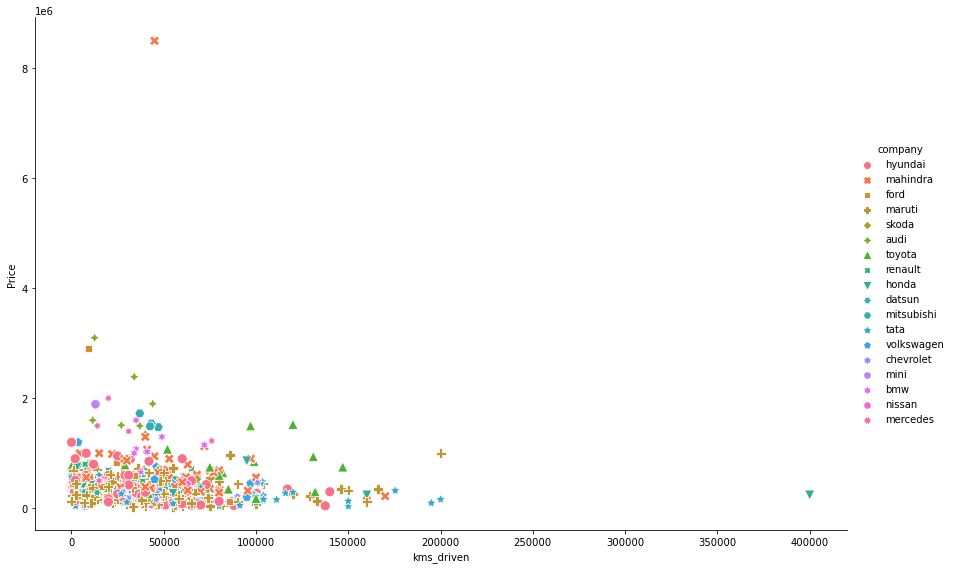

In [29]:

ax=sns.relplot(data=data, x='kms_driven', y='Price', hue='company', height=8, aspect=1.5, style='company', s=100)


***From the above plot, we can see there are some outliers in 'kms_driven' and 'Price' column <br> Lets remove these outliers***

In [30]:
data.drop(data[data['kms_driven']>250000].index, axis=0, inplace=True)

In [31]:
data.drop(data[data['Price']>4000000].index, axis=0, inplace=True)

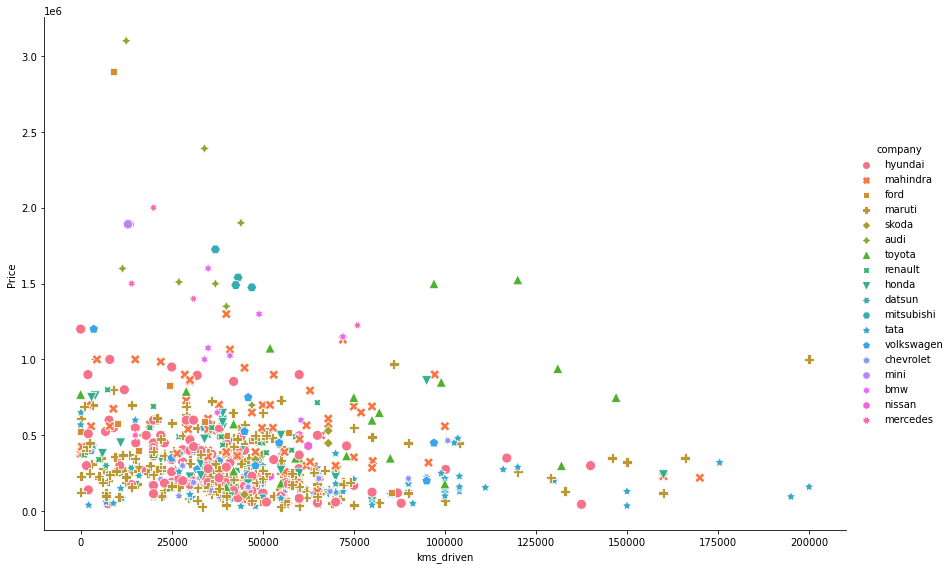

In [32]:

ax=sns.relplot(data=data, x='kms_driven', y='Price', hue='company', height=8, aspect=1.5, style='company', s=100)


In [33]:
data.head()

,company,name,year,Price,kms_driven,fuel_type
0,hyundai,hyundai santro,2007,80000,45000,Petrol
1,mahindra,mahindra jeep,2006,425000,40,Diesel
3,hyundai,hyundai grand,2014,325000,28000,Petrol
4,ford,ford ecosport,2014,575000,36000,Diesel
6,ford,ford figo,2012,175000,41000,Diesel


***Lets check relationship between 'price' and 'fuel_type'***

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

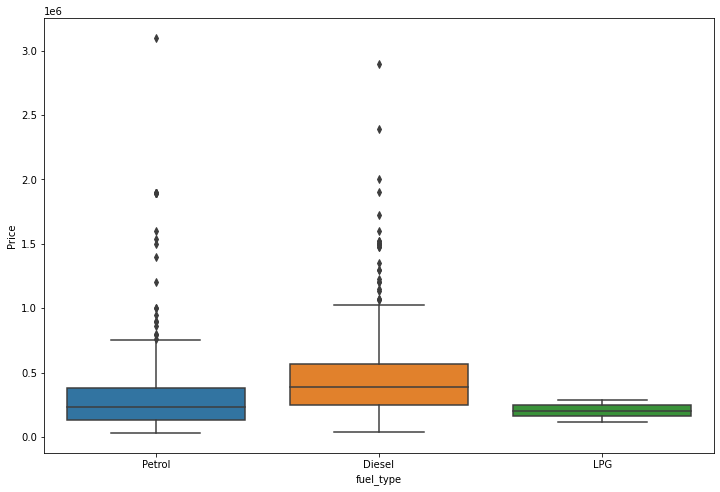

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data, x= 'fuel_type', y='Price')

In [35]:
data.head()

,company,name,year,Price,kms_driven,fuel_type
0,hyundai,hyundai santro,2007,80000,45000,Petrol
1,mahindra,mahindra jeep,2006,425000,40,Diesel
3,hyundai,hyundai grand,2014,325000,28000,Petrol
4,ford,ford ecosport,2014,575000,36000,Diesel
6,ford,ford figo,2012,175000,41000,Diesel


<AxesSubplot:xlabel='year', ylabel='Price'>

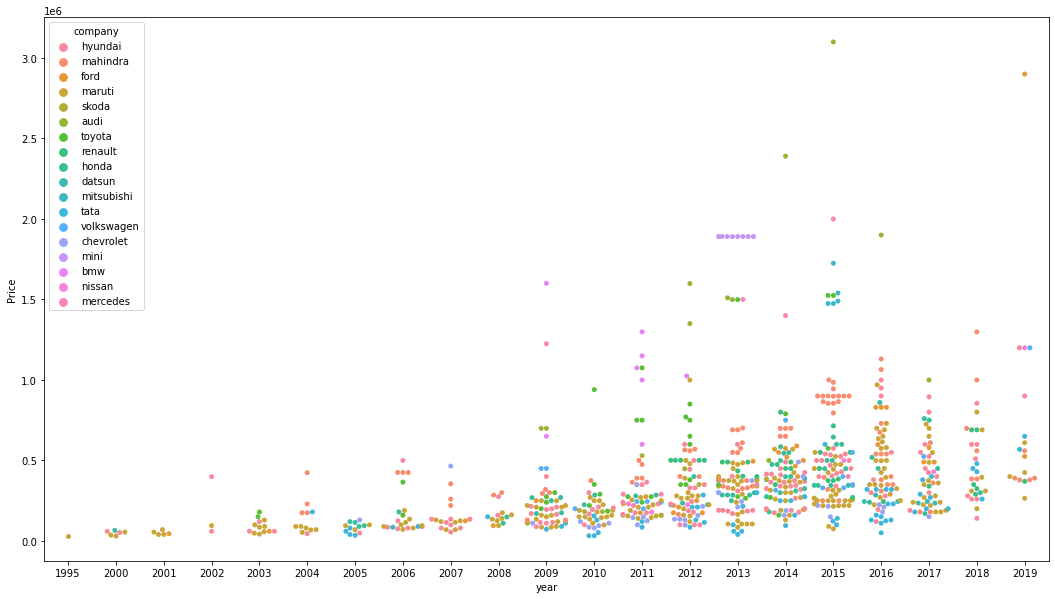

In [67]:
plt.figure(figsize=(18,10)) 
sorted_year = (data['year'].unique().tolist())
sorted_year.sort()
sns.swarmplot(data= data, x= 'year', y='Price', order=sorted_year, hue='company')

***Lets Start Building the Model (Linear Regression)***

In [590]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


In [591]:
# here we have reduced some datapoints to achieve better accuracy (we have removed non-significant columns)

data1 = data1[~data1['name'].isin((data.name.value_counts()[data.name.value_counts()<3]).index.to_list())]


In [592]:
ohe=OneHotEncoder()
ohe.fit(data1[['name','company','fuel_type']])

column_trans = ColumnTransformer(transformers=[('t1', OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type'])],remainder='passthrough', sparse_threshold=0)

lr = LinearRegression()

pipe = make_pipeline(column_trans,lr)

***Lets check for what random state the model is giving maximum r2 score***

In [593]:
r_score_test=[]
r_score_train=[]
for i in range(0,1000):
    train, test = train_test_split(data1, train_size=0.8, random_state=i)
    train_x = pd.concat([train.iloc[:,0:3:],train.iloc[:,4::]], axis=1)
    train_y = train.iloc[:,3]
    test_x = pd.concat([test.iloc[:,0:3:],test.iloc[:,4::]], axis=1)
    test_y = test.iloc[:,3]
    pipe.fit(train_x,train_y)
    pred_test = pipe.predict(test_x)
    pred_train = pipe.predict(train_x)
    r_score_test.append(r2_score(test_y, pred_test))
    r_score_train.append(r2_score(train_y, pred_train))

In [594]:
max(r_score_test)

0.9380131348511307

In [595]:
max(r_score_train)

0.8975540645449281

***since we have got to know the random state for the max r2 score, lets build model on the same random state***

In [596]:
train, test = train_test_split(data1, train_size=0.8, random_state=r_score_test.index(max(r_score_test)))
train_x = pd.concat([train.iloc[:,0:3:],train.iloc[:,4::]], axis=1)
train_y = train.iloc[:,3]
test_x = pd.concat([test.iloc[:,0:3:],test.iloc[:,4::]], axis=1)
test_y = test.iloc[:,3]

pipe.fit(train_x,train_y)
pred_test = pipe.predict(test_x)
pred_train = pipe.predict(train_x)

In [597]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [598]:
r2_score(test_y, pred_test)

0.9380131348511307

In [620]:
n = train_x.shape[0]
k = len(column_trans.get_feature_names())
adjusted_r2 = 1-((1-(max(r_score_test)))*(n-1))/(n-k-1)
adjusted_r2

0.9267427957331544

In [599]:
mean_squared_error(test_y, pred_test)

7458172878.559141

In [600]:
mean_absolute_percentage_error(test_y, pred_test)

0.2588366995646292

In [601]:
mean_absolute_error(test_y, pred_test)

63660.95327613467

***Lets try to build the model using statsmodel.api, here we will be able to determine what all columns are non significant usint their p value***

In [602]:
import statsmodels.api as sm

In [603]:
df1 = pd.DataFrame(column_trans.fit_transform(train_x), columns=column_trans.get_feature_names())

In [604]:
y = list(train_y)

In [605]:
x = sm.add_constant(df1)
lr1 = sm.OLS(y, x.astype(float)).fit()
lr1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     38.43
Date:                Sat, 26 Nov 2022   Prob (F-statistic):          5.47e-164
Time:                        11:01:50   Log-Likelihood:                -7717.1
No. Observations:                 586   AIC:                         1.558e+04
Df Residuals:                     514   BIC:                         1.589e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -3.945e+07   2.89e+06    -13.633      0.000   -4.51e+07   -3.38e+07
t1__x0_audi a4             -1.352e+06   1.27e+05    -10.660      0.000    -1.6e+06    -1.1e+06
t1__x0_bmw x1              -1.467e+06   1.31e+05    -11.210      0.000   -1.72e+06   -1.21e+06
t1__x0_chevrolet beat      -8.705e+05   6.94e+04    -12.547      0.000   -1.01e+06   -7.34e+05
t1__x0_chevrolet sail      -6.969e+05   1.23e+05     -5.685      0.000   -9.38e+05   -4.56e+05
t1__x0_chevrolet spark     -8.093e+05   7.98e+04    -10.139      0.000   -9.66e+05   -6.53e+05
t1__x0_chevrolet tavera    -5.719e+05    8.3e+04     -6.894      0.000   -7.35e+05   -4.09e+05
t1__x0_datsun redi         -1.906e+06   1.32e+05    -14.421      0.000   -2.17e+06   -1.65e+06
t1__x0_ford ecosport       -7.268e+05      8e+04     -9.091      0.000   -8.84e+05    -5.7e+05
t1__x0_ford figo           -1.049e+06   8.55e+04    -12.272      0.000   -1.22e+06   -8.81e+05
t1__x0_ford ikon           -9.367e+05   9.09e+04    -10.307      0.000   -1.12e+06   -7.58e+05
t1__x0_honda amaze         -9.655e+05   7.81e+04    -12.363      0.000   -1.12e+06   -8.12e+05
t1__x0_honda brio           -9.67e+05   1.19e+05     -8.154      0.000    -1.2e+06   -7.34e+05
t1__x0_honda city          -7.921e+05   7.34e+04    -10.798      0.000   -9.36e+05   -6.48e+05
t1__x0_hyundai accent      -4.049e+05    7.4e+04     -5.472      0.000    -5.5e+05    -2.6e+05
t1__x0_hyundai creta        2.087e+05   6.43e+04      3.246      0.001    8.24e+04    3.35e+05
t1__x0_hyundai elite       -2.638e+05   4.82e+04     -5.472      0.000   -3.59e+05   -1.69e+05
t1__x0_hyundai eon         -5.136e+05    4.4e+04    -11.675      0.000      -6e+05   -4.27e+05
t1__x0_hyundai fluidic     -2.572e+05    7.8e+04     -3.297      0.001    -4.1e+05   -1.04e+05
t1__x0_hyundai getz        -3.962e+05   6.48e+04     -6.111      0.000   -5.24e+05   -2.69e+05
t1__x0_hyundai grand       -3.514e+05    4.6e+04     -7.641      0.000   -4.42e+05   -2.61e+05
t1__x0_hyundai i10         -3.548e+05   4.57e+04     -7.763      0.000   -4.45e+05   -2.65e+05
t1__x0_hyundai i20         -3.536e+05   3.81e+04     -9.292      0.000   -4.28e+05   -2.79e+05
t1__x0_hyundai santro      -3.529e+05   3.67e+04     -9.609      0.000   -4.25e+05   -2.81e+05
t1__x0_hyundai verna       -2.427e+05   4.78e+04     -5.077      0.000   -3.37e+05   -1.49e+05
t1__x0_mahindra bolero     -6.007e+05   6.37e+04     -9.434      0.000   -7.26e+05   -4.76e+05
t1__x0_mahindra jeep       -5.054e+05   5.11e+04     -9.884      0.000   -6.06e+05   -4.05e+05
t1__x0_mahindra kuv100     -5.003e+05   7.15e+04     -6.994      0.000   -6.41e+05    -3.6e+05
t1__x0_mahindra quanto     -4.882e+05   6.69e+04     -7.297      0.000    -6.2e+05   -3.57e+05
t1__x0_mahindra scorpio    -2.933e+05   3.7

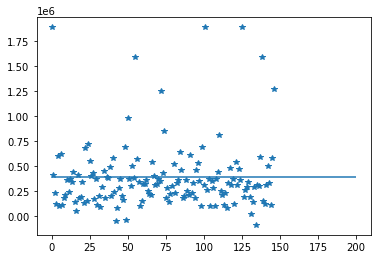

In [567]:
plt.plot( range(0,147),pred_test,'*')
plt.hlines(test_y.mean(),0,200)

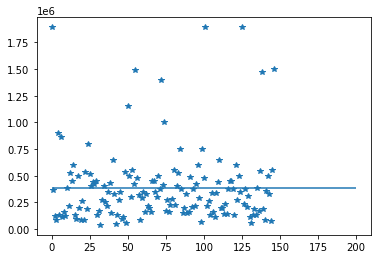

In [569]:
plt.plot(range(0,147),test_y,'*')
plt.hlines(test_y.mean(),0,200)

In [646]:
# Since we have used pipeline to build our model, we can directly predict the price by passing the values directly

pipe.predict(pd.DataFrame(columns=test_x.columns, data = np.array(['marutisuzuki swift',' ','2018','22000','Diesel']).reshape(1,5)))

array([1445189.1607666])

In [636]:
# we have built the model, lets check the result

print('R2 score for the model is : ' + str(r2_score(test_y, pred_test)))
print('adjusted r2 score for the model is : '+str(adjusted_r2))
print('Since there is very less difference between r2 score and adjusted r2 score, we can say that model is not overfitted')
print('*'*127)
print('mean absolute percentage error is : '+str(mean_absolute_percentage_error(test_y, pred_test)*100)+'%')
print('mean absolute error is : '+str(mean_absolute_error(test_y, pred_test)))
print('by using the random state, we are able to achieve these statistics which are best that can be achieved')
print('*'*127)
print('R2 score for the model (test) is : ' + str(r2_score(test_y, pred_test)))
print('R2 score for the model (train) is : ' + str(r2_score(train_y, pred_train)))
print('these statistics also show that model is not overfitted')

R2 score for the model is : 0.9380131348511307
adjusted r2 score for the model is : 0.9267427957331544
Since there is very less difference between r2 score and adjusted r2 score, we can say that model is not overfitted
*******************************************************************************************************************************
mean absolute percentage error is : 25.883669956462917%
mean absolute error is : 63660.95327613467
by using the random state, we are able to achieve these statistics which are best that can be achieved
*******************************************************************************************************************************
R2 score for the model (test) is : 0.9380131348511307
R2 score for the model (train) is : 0.8414817924596669
these statistics also show that model is not overfitted


In [640]:
data1['name'].value_counts().index

Index(['marutisuzuki swift', 'marutisuzuki alto', 'mahindra scorpio',
       'honda city', 'marutisuzuki wagon', 'hyundai i20', 'tata indigo',
       'renault duster', 'hyundai santro', 'honda amaze', 'chevrolet beat',
       'hyundai eon', 'marutisuzuki ertiga', 'hyundai grand', 'hyundai elite',
       'hyundai verna', 'ford ecosport', 'marutisuzuki dzire',
       'marutisuzuki zen', 'mahindra xuv500', 'toyota corolla', 'tata indica',
       'hyundai i10', 'mahindra jeep', 'volkswagen polo', 'toyota etios',
       'marutisuzuki omni', 'mahindra xylo', 'tata sumo', 'mini cooper',
       'marutisuzuki ritz', 'ford figo', 'toyota innova', 'renault kwid',
       'skoda fabia', 'mahindra quanto', 'mahindra tuv300', 'tata zest',
       'mahindra bolero', 'volkswagen vento', 'chevrolet spark', 'tata nano',
       'mercedes benz', 'mahindra kuv100', 'audi a4', 'hyundai creta',
       'toyota fortuner', 'hyundai getz', 'marutisuzuki eeco',
       'mitsubishi pajero', 'marutisuzuki sx4', 'datsu

In [643]:
data1.to_csv('C:/Users/ASUS/Desktop/python_datasets/imarticus/Pranjal_Sir/Cleaned_Car_Pred.csv')